## Deep Learning ANN Model with Structured Data to predict Iris Flower speices

In [1]:
! python -c 'tensorflow' || pip tensorflow --user

In [2]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
print(tf.__version__)

2.10.1


In [4]:
# Load Data and review contents
iris_data = pd.read_csv("iris.csv")
print("-----------------\nLoaded Data : \n-----------------")

-----------------
Loaded Data : 
-----------------


In [5]:
print(iris_data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [6]:
# Using a label encoder to convert String to numeric values for the target variables
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

In [7]:
# Converting an input to a numpy array
np_iris = iris_data.to_numpy()

In [8]:
# Seperating feature and target variables
X_data = np_iris[:, 0:4]
Y_data = np_iris[:,-1]

In [9]:
# Validating feature variables
print("\nFeature variables before scaling : \n-----------------")
print(X_data[:5, :])
# Validating target variables
print("\nTarget variables before scaling : \n-----------------")
print(Y_data[:5])


Feature variables before scaling : 
-----------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target variables before scaling : 
-----------------
[0. 0. 0. 0. 0.]


In [10]:
# Creating a scalar model to fit the input data
scaler = StandardScaler().fit(X_data)

# Scaling the neumeric feature variables
X_data = scaler.transform(X_data)

In [11]:
#Converting target variable as a one-hot-encoding array to create 3 columns to represent species  
Y_data = tf.keras.utils.to_categorical(Y_data, 3)

In [12]:
# Validating feature variables
print("\nFeature variables after scaling : \n-----------------")
print(X_data[:5, :])

# Validating target variables
print("\nTarget variables after scaling : \n-----------------")
print(Y_data[:5])


Feature variables after scaling : 
-----------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target variables after scaling : 
-----------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [13]:
# Splitting training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.10)

print("\nTrain Test Dimentions : \n-----------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Train Test Dimentions : 
-----------------
(135, 4) (135, 3) (15, 4) (15, 3)


## Creating a Model

In [14]:
from tensorflow import keras

In [15]:
# Number of cclasses in the target variables
NB_Classes = 3

# Create a sequential model in Keras
model = tf.keras.models.Sequential()

#Add a first hidden layer with relu activation
model.add(keras.layers.Dense(128, input_shape =(4, ), name='Hidden-Layer-1', activation='relu'))

#Add a second hidden layer with relu activation
model.add(keras.layers.Dense(128, name ='Hidden-Layer-2', activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_Classes, name='Output-Layer-3', activation='softmax'))

#Compile the model with loss and metrics
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer-3 (Dense)      (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


## Training and evaluating the Model


Training Progess: 
-----------------
Epoch 1/10
7/7 [==============================] - 1s 45ms/step - loss: 0.8491 - accuracy: 0.6481 - val_loss: 0.6581 - val_accuracy: 0.8519
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.5773 - accuracy: 0.8056 - val_loss: 0.4865 - val_accuracy: 0.8889
Epoch 3/10
7/7 [==============================] - 0s 12ms/step - loss: 0.4717 - accuracy: 0.8056 - val_loss: 0.4238 - val_accuracy: 0.8889
Epoch 4/10
7/7 [==============================] - 0s 12ms/step - loss: 0.4056 - accuracy: 0.8611 - val_loss: 0.3447 - val_accuracy: 0.9259
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.3521 - accuracy: 0.8704 - val_loss: 0.3170 - val_accuracy: 0.8889
Epoch 6/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3188 - accuracy: 0.9167 - val_loss: 0.2718 - val_accuracy: 0.8889
Epoch 7/10
7/7 [==============================] - 0s 13ms/step - loss: 0.2839 - accuracy: 0.9167 - val_loss: 0.2331 - val_accura

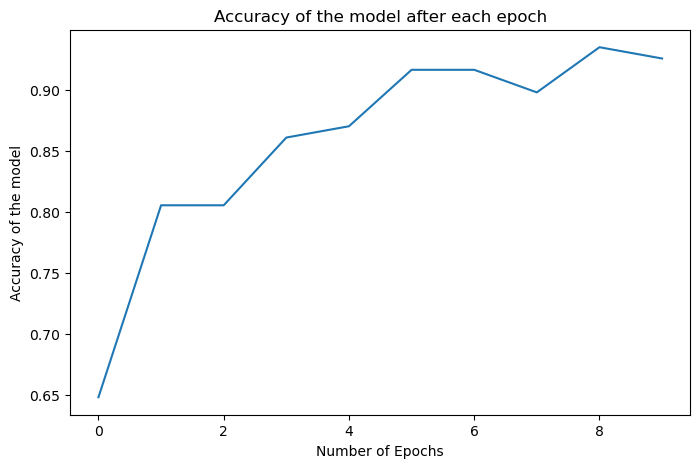


Evaluation against the test dataset: 
-----------------
1/1 [==============================] - 0s 30ms/step - loss: 0.1923 - accuracy: 0.9333


[0.19234906136989594, 0.9333333373069763]

In [16]:
# Making it versbose to view the progress
VERBOSE = 1

# Setting up Hyper Parameters for training

# Set Batch Size
BATCH_SIZE = 16

#Set number of epochs
EPOCHS = 10

#Set validation split. 20% of the training data will be used for validation after each epoch
VALIDATION_SPLIT = 0.2

print("\nTraining Progess: \n-----------------")

#Fit the model. This will perform the entire training cycle, including forward propagation, loss computation, backpropagation 
#and gradient descent.
# Execute for the specified batch sizes and epoch
# Perform validation after each epoch
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training Progess: \n-----------------")
import matplotlib.pyplot as plt

# Plot accuracy of the model after each epoch
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8, 5))
plt.title("Accuracy of the model after each epoch")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of the model")
plt.show() 

#Evaluate the model against the test dataset and print the results
print("\nEvaluation against the test dataset: \n-----------------")
model.evaluate(X_test, Y_test)

## Saving and Loading the Models
#### The training and inference are usally separate. Models need to be saved after they are validated. Models are then loaded into the inference environments for actual prediction

In [19]:
# Saving a model
model.save("iris_save")

#Loading a saved Model
load_model = keras.models.load_model("iris_save")

#Print Model Summary
load_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer-3 (Dense)      (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### Predictions with a Deep Learning Model

In [30]:
# Raw Prediction data
prediction_input = [[6.6, 3., 4.4, 1.4]]


#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities from np.argmax
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :", raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 22ms/step
Raw Prediction Output (Probabilities) : [[0.01944748 0.75395554 0.22659698]]
Prediction is  ['versicolor']
